# Malware Detection Using Deep Learning

### Project is named Hitler System!

He was immediate and emphatic revulsion as that of Nazi leader Adolf Hitler. His hands are stained with the blood of millions killed in the devastation of the Second World War and the horror of the Holocaust. 

He used to Identify/ Detect Jews from hidden place used to kill them. 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

### Download Datasets : https://raw.githubusercontent.com/Projects-Developer/Malware-Detection-Using-Deep-Learning-Project/main/Malware%20dataset.csv

In [24]:
data =pd.read_csv(r"https://raw.githubusercontent.com/Projects-Developer/Malware-Detection-Using-Deep-Learning-Project/main/Malware%20dataset.csv")

In [ ]:
print(data.head(1))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [26]:
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [7]:
data.tail()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99999,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,999,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


In [8]:
for i in data.columns:
    print(i)

hash
millisecond
classification
state
usage_counter
prio
static_prio
normal_prio
policy
vm_pgoff
vm_truncate_count
task_size
cached_hole_size
free_area_cache
mm_users
map_count
hiwater_rss
total_vm
shared_vm
exec_vm
reserved_vm
nr_ptes
end_data
last_interval
nvcsw
nivcsw
min_flt
maj_flt
fs_excl_counter
lock
utime
stime
gtime
cgtime
signal_nvcsw


In [9]:
data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,100,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,NaN,malware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,NaN,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,NaN,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,NaN,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,NaN,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [27]:
data['classification'] =data.classification.map({'benign':0, 'malware':1})
#1 for malware and 0 for benign 

In [28]:
data["classification"].value_counts()

classification
1    50000
0    50000
Name: count, dtype: int64

In [12]:
data = data.sample(frac=1).reset_index(drop=True)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#sns.countplot('hash',data=data)

In [31]:
#sns.countplot('millisecond',data=data)

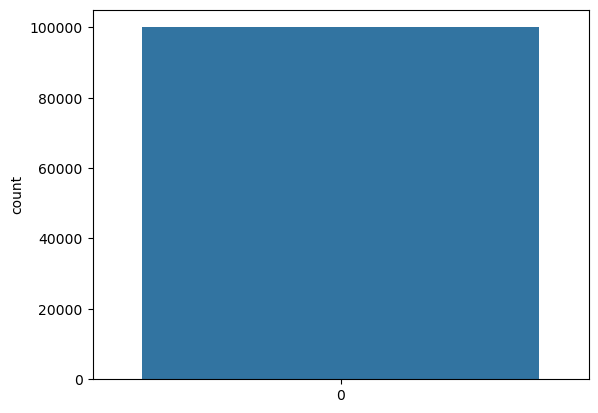

In [16]:
sns.countplot(data["classification"])
plt.show()

In [32]:
X = data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data["classification"]

In [33]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [35]:
input_size = 27 

#Number of Outputs
output_size = 2 

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

NameError: name 'tf' is not defined

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 20

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [ ]:

result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
                   #callbacks=[early_stopping],
                   validation_split=0.2)

In [ ]:
# Visualize the result
plt.plot(result.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(result.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

In [ ]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

In [ ]:
# Visualize the result
plt.plot(result.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(result.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))
